In [2]:
import numpy
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import utils

In [81]:
def Gd(s):
    G11 = 4.2/(6.2*s + 1)#*numpy.exp(-12*s)
    G21 = 15.9/(6.9*s + 1)#*numpy.exp(-10.5*s)
    G31 = -0.8655/(7.01*s + 1)#*numpy.exp(-0.6*s)
    G12 = 2800*(-0.028952*s - 0.0011)/((7.85*s +1)*(14.63*s + 1))#*numpy.exp(-s)
    G22 = 2800*(-0.062784*s - 0.0032)/((7.29*s +1)*(8.94*s + 1))#*numpy.exp(-3.44*s)
    G32 = -2.24/(7.76*s + 1)#*numpy.exp(-2.6*s)
    return numpy.matrix([[G11, G12],
                         [G21, G22],
                         [G31, G32]])

In [82]:
omega = numpy.logspace(-2, 2, 1000)

In [83]:
s = omega*1j

In [84]:
gd1 = [numpy.linalg.norm(Gd(si)[:,0]) for si in s]
gd2 = [numpy.linalg.norm(Gd(si)[:,1]) for si in s]

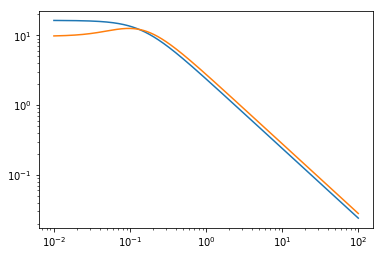

In [85]:
plt.loglog(omega, numpy.array(gd1))
plt.loglog(omega, numpy.array(gd2))

# For Perfect Control

In [290]:
Kc=4
def G(s):
    G11 = 4.29 / ((6.7 * s + 1))
    G12 = -2.38 / ((8.64 * s + 1))
    G13 = -2.156 / ((9.06 * s + 1))
    G21 = 7.215 / ((3.25 * s + 1))
    G22 = -9.218 / ((5.0 * s + 1))
    G23 = -2.156 / ((9.06 * s + 1))
    G31 = -0.5635 / ((8.15 * s + 1))
    G32 =  0.451143 / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [291]:
def sigma(Gfr):
    return numpy.linalg.svd(Gfr)

In [292]:
def S(s):
    return numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s)

In [293]:
S_freq_responses = [S(si) for si in s]

In [294]:
S_sigmas = [sigma(G_fr)[1] for G_fr in S_freq_responses]

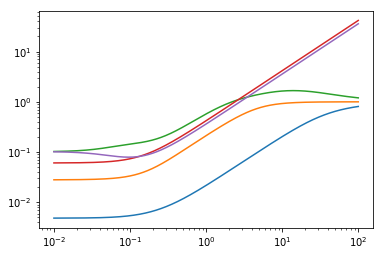

In [295]:
S_sigmas = numpy.array(S_sigmas)
plt.loglog(omega, 1/S_sigmas)
plt.loglog(omega, 1/numpy.array(gd1))
plt.loglog(omega, 1/numpy.array(gd2))

In [296]:
GGd1 = [numpy.linalg.inv(G(si))*Gd(si)[:,0] for si in s]
GGd2 = [numpy.linalg.inv(G(si))*Gd(si)[:,1] for si in s]

In [297]:
sGGd1 = [sigma(Gi)[1] for Gi in GGd1]
sGGd2 = [sigma(Gi)[1] for Gi in GGd2]

In [298]:
GGd3 = [numpy.linalg.inv(G(si))*Gd(si) for si in s]

In [299]:
maxsumnorm = [numpy.abs(max(sum(GGdi[:,0])), sum(GGdi[:,1]))[0,0] for GGdi in GGd3]

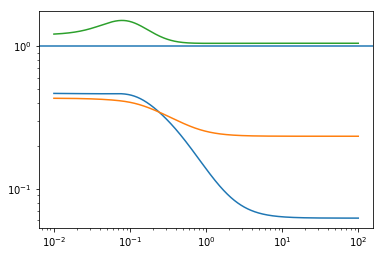

In [300]:
plt.loglog(omega, maxsumnorm)
plt.loglog(omega, sGGd1)
plt.loglog(omega, sGGd2)
plt.axhline(1)

# For Acceptable Control

In [301]:
UhGd = [numpy.linalg.svd(G(si))[0].H*Gd(si) for si in s]
sigmaG = [numpy.linalg.svd(G(si))[1] for si in s]

In [302]:
Final1 = [UhGd[i][0,:].max() for i in range(len(sigmaG))]

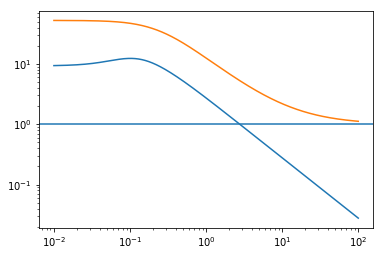

In [303]:
plt.loglog(omega, Final1)
plt.loglog(omega, numpy.array(sigmaG)[:,0] + 1)
plt.axhline(1)

In [304]:
Final2 = [UhGd[i][1,:].max() for i in range(len(sigmaG))]

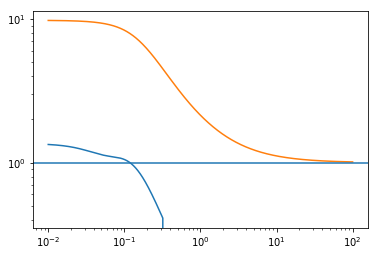

In [305]:
plt.loglog(omega, Final2)
plt.loglog(omega, numpy.array(sigmaG)[:,1] + 1)
plt.axhline(1)

In [306]:
Final3 = [UhGd[i][2,:].max() for i in range(len(sigmaG))]

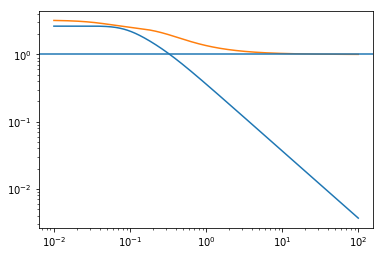

In [307]:
plt.loglog(omega, Final3)
plt.loglog(omega, numpy.array(sigmaG)[:,2] + 1)
plt.axhline(1)